## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from copy import copy
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Loading the data

In [2]:
data = pd.read_csv('Data/data.csv',on_bad_lines='skip', parse_dates=['InvoiceDate'], encoding='latin1',)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Lets do Descriptive stats

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Lets create EDA report using Pandas-Profile library

In [6]:
# report = ProfileReport(data)

In [7]:
# report.to_file("output.html")

## Top 20 number of quantity the customer usually buys

In [8]:
data['Quantity'].value_counts().head(20)

 1      148227
 2       81829
 12      61063
 6       40868
 4       38484
 3       37121
 24      24021
 10      22288
 8       13129
 5       11757
 48       6068
 25       5124
 20       5019
 16       4266
-1        4184
 36       3822
 7        2914
 9        2037
 72       1946
 100      1819
Name: Quantity, dtype: int64

<AxesSubplot:>

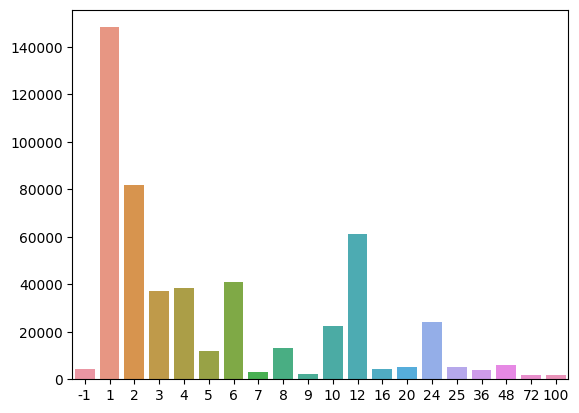

In [9]:
temp = data['Quantity'].value_counts().head(20)

sns.barplot(x= temp.index, y= temp.values,)

In [10]:
## there are any negative values in Quantity column
data['Quantity'].min()

-80995

In [11]:
#Filter out records with negative values from Quantity column

data = data[data['Quantity']>0]

## Lets verify
data['Quantity'].describe()


count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [12]:
## there are any negative values in UnitPrice column
data = data[data['UnitPrice']>0]

## Lets verify
data['UnitPrice'].describe()

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [13]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [14]:
## Lets see the dominant country in the data

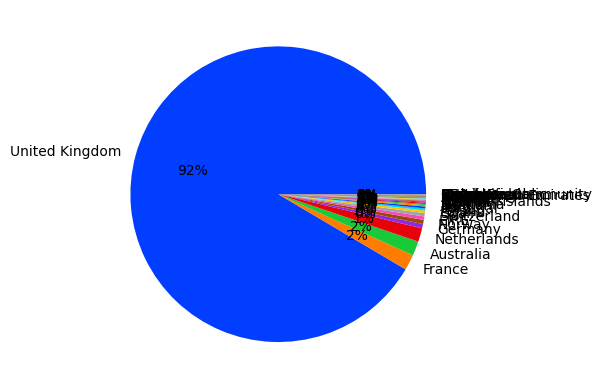

In [15]:
keys = data['Country'].unique()

palette_color = sns.color_palette('bright')

plt.pie(data['Country'].value_counts().values, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.show()

In [16]:
## Since UK is the dominat one and 92% of the data 
## We are dropping the other contries from the data

data = data.loc[(data['Country'] == 'United Kingdom')]

In [17]:
data.duplicated().sum()

5138

In [18]:
data.dropna(subset=['CustomerID'], how='all',inplace=True, axis = 'index')

In [19]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
data.shape

(354321, 8)

In [21]:
## Creating a new column called TotalPrice and rounding to one decimal

data['TotalPrice'] = np.round((data['Quantity'] * data['UnitPrice']), 1)

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.3


## Creating RFM table

In [22]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [23]:
## we are setting the current date as 2011-12-10 since the last invoice date was 2011-12-09. 
## current_date is to calculate the number of days from recent purchase

current_date = datetime.datetime(2011,12,10)

In [104]:
## Creating RMF score per customers

RMF_data = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': lambda x: len(x), "TotalPrice" : lambda x: x.sum()})

RMF_data.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.6
12747.0,2,103,4195.5
12748.0,0,4595,33721.4
12749.0,3,199,4090.2
12820.0,3,59,942.6


In [25]:
## Renaming the column names

RMF_data = RMF_data.rename(columns={'InvoiceDate': 'Recency','InvoiceNo':'Frequency', 'TotalPrice':'Monetary'})

RMF_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.6
12747.0,2,103,4195.5
12748.0,0,4595,33721.4
12749.0,3,199,4090.2
12820.0,3,59,942.6


In [26]:
RMF_data.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,90.388010,1864.480332
std,99.533485,217.808385,7482.860998
min,0.000000,1.000000,3.800000
25%,17.000000,17.000000,300.150000
50%,50.000000,41.000000,651.650000
75%,142.000000,99.250000,1576.400000
max,373.000000,7847.000000,259656.800000


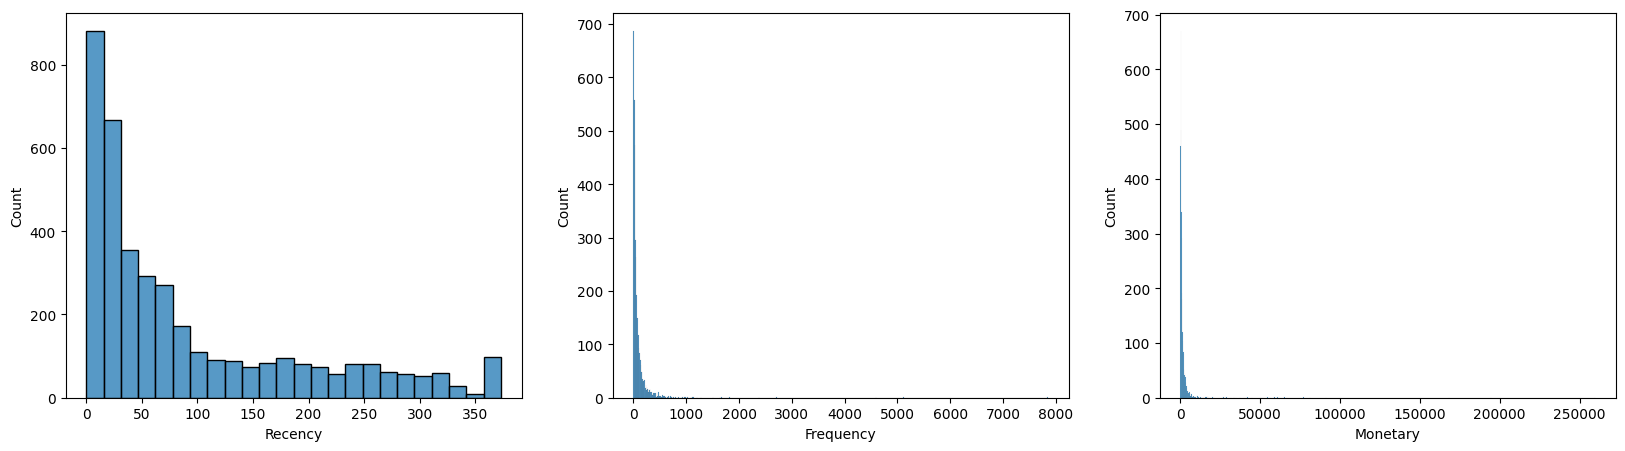

In [27]:
## Visualizing the distribution of Recency, Frequency and Monetary columns


fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.histplot(RMF_data['Recency'], ax=axes[0]);
sns.histplot(RMF_data['Frequency'], ax=axes[1]);
sns.histplot(RMF_data['Monetary'], ax=axes[2]);

## Lets work on Skewness

In [28]:
## Lets handle the Skewness

def skew_analyzer(data, column):
    
    transformer1 = PowerTransformer(method='yeo-johnson')
    transformer2 = PowerTransformer(method='box-cox')
    
    # variables needed for power transform
    len_of_data = len(data[column].values)
    reshaped_data = data[column].values.reshape(len_of_data, 1) ##Reshaping the data of pd.Series of 1D to 2D, since PowerTransformer needs 2D data
    
    
    fig, axes = plt.subplots(2, 3, figsize = (11,11))
    
    axes[0,0].title.set_text('Raw data')
    sns.histplot(data[column], ax = axes[0,0],kde = True) # Raw data visualization
    
    axes[0,1].title.set_text('log transformation')
    sns.histplot(np.log(data[column]), ax = axes[0,1], kde = True)  # log transformation data visualization
    
    axes[0,2].title.set_text('sqrt transformation')
    sns.histplot(np.sqrt(data[column]), ax = axes[0,2], kde = True) # Sqrt transformation data visualization
    
    axes[1,0].title.set_text('cube root transformation')
    sns.histplot(np.cbrt(data[column]), ax = axes[1,0], kde = True) # cube root transformation data visualization
    
    axes[1,1].title.set_text('Yeo_johnson transformation')
    sns.histplot(transformer1.fit_transform(reshaped_data), ax = axes[1,1], kde = True) # Yeo_johnson (reshaped data is used)
    
    axes[1,2].title.set_text('Box_Cox transformation')
    sns.histplot(transformer1.fit_transform(reshaped_data), ax = axes[1,2], kde = True) # Box_Cox (reshaped data is used)
     
    plt.show()
    


C:\ProgramData\Anaconda3\envs\RFM_Customer_Segmentation\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


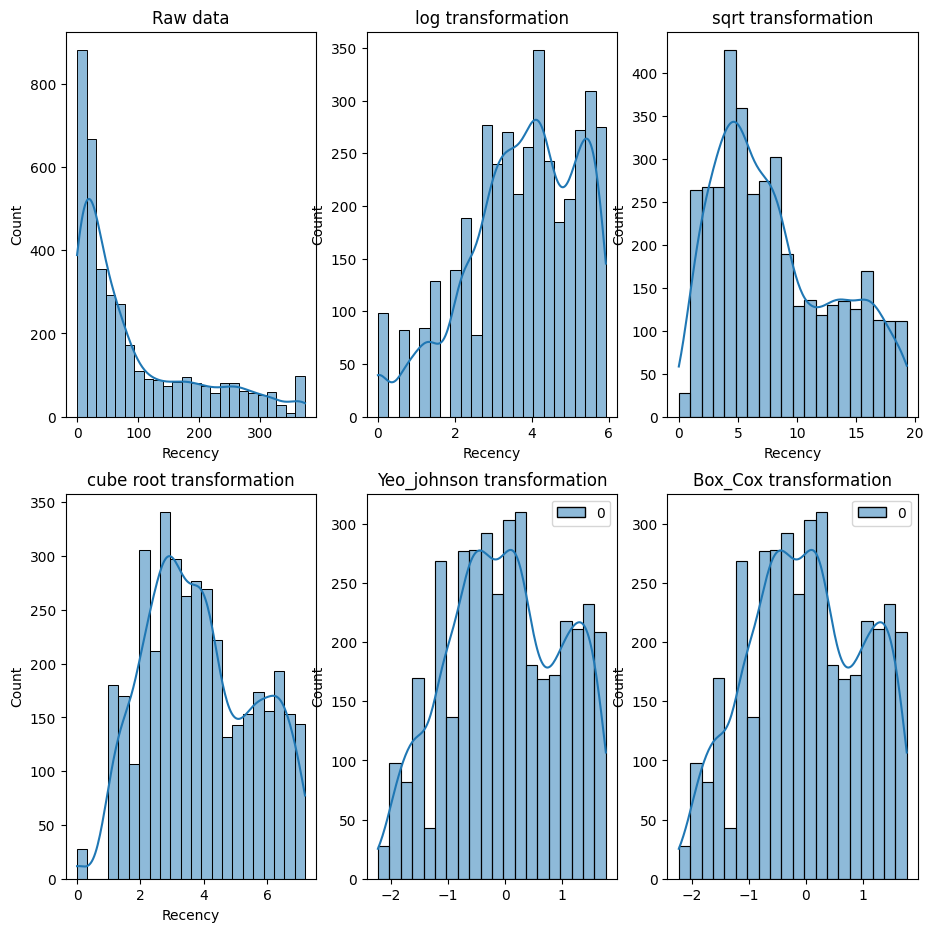

In [29]:
skew_analyzer(RMF_data,'Recency')

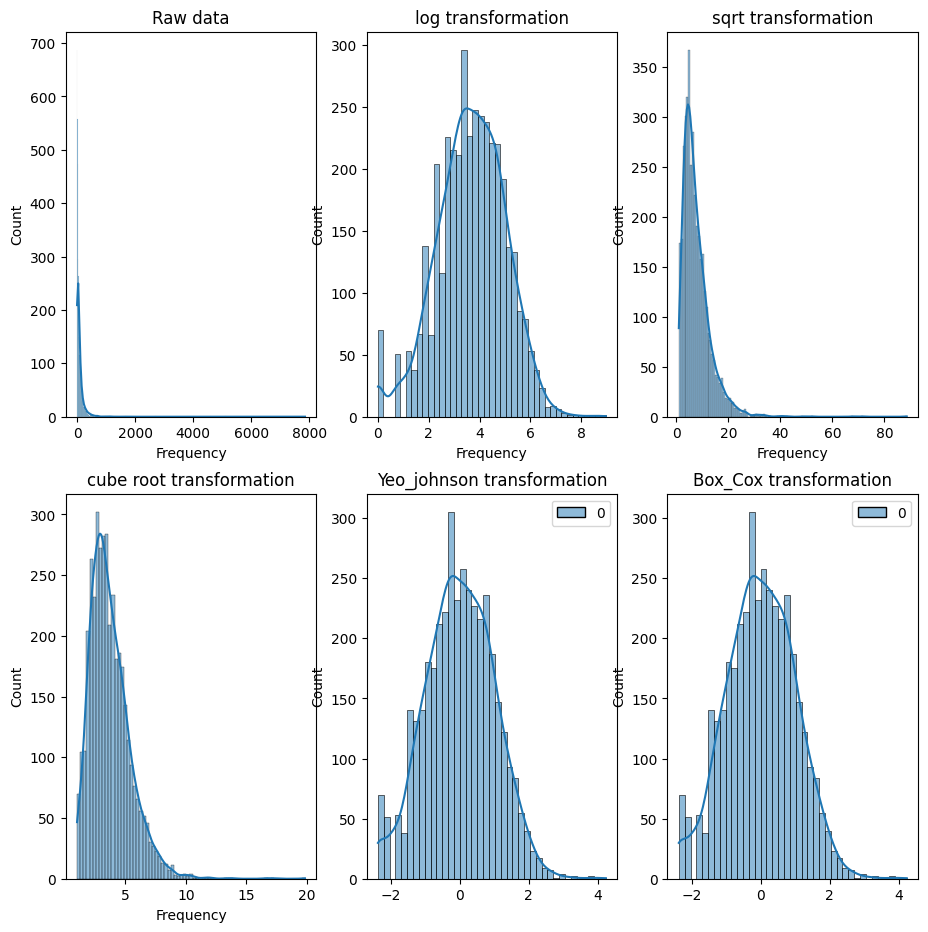

In [30]:
skew_analyzer(RMF_data,'Frequency')

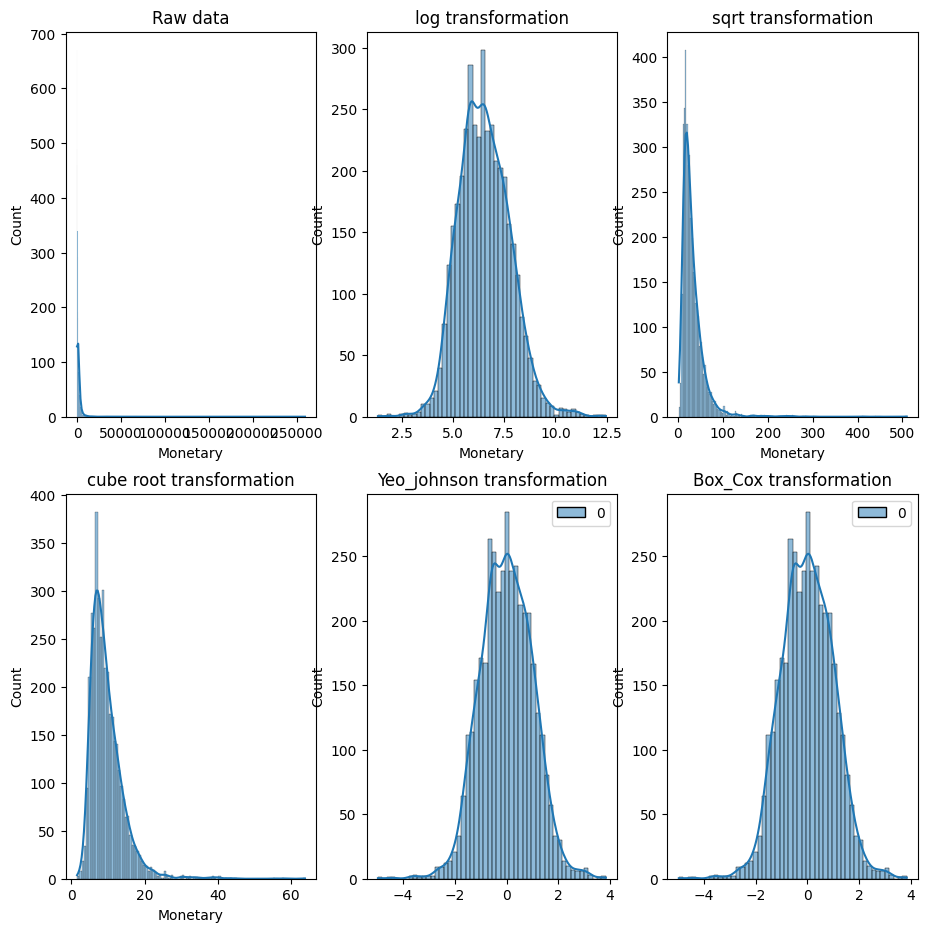

In [31]:
skew_analyzer(RMF_data,'Monetary')

In [32]:
## Here Yeo_johnson or Box_Cox works good with all columns in the data

## Lets see and handle Outliers

In [33]:
## Lets see the 1 percentile and 99 percentile of the RMF_data

RMF_data.quantile([0.01,0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99], axis = 0)

,Recency,Frequency,Monetary
0.01,1.00,1.00,51.190
0.05,2.00,4.00,110.895
0.10,5.00,7.00,152.970
0.25,17.00,17.00,300.150
0.50,50.00,41.00,651.650
0.75,142.00,99.25,1576.400
0.95,310.00,314.05,5493.475
0.99,368.81,670.10,17281.424


In [34]:
RMF_data.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,90.388010,1864.480332
std,99.533485,217.808385,7482.860998
min,0.000000,1.000000,3.800000
25%,17.000000,17.000000,300.150000
50%,50.000000,41.000000,651.650000
75%,142.000000,99.250000,1576.400000
max,373.000000,7847.000000,259656.800000


In [35]:
## here we can see Monetary have extreme min values and Frequency and Monetary have extreme max values

In [36]:
# r1 = ProfileReport(RMF_data)

# r1.to_file("output1.html")

###  Lets see how Dropping the Outliers affects the data distribution

In [37]:
# Dropping in records above 99 percentile and below 1 percentile

def drop_outliers(data, column, min_percentile = 0.01, max_percentile = 0.99):
    
    df_temp = copy(data)
      
    mini = df_temp[column].quantile(min_percentile) 
    maxi = df_temp[column].quantile(max_percentile)     
    
    return df_temp.loc[(df_temp[column]<maxi) & (df_temp[column]>mini)]

In [38]:
df = drop_outliers(RMF_data, 'Recency')

df = drop_outliers(df, 'Frequency')

df = drop_outliers(df, 'Monetary')

In [39]:
df.describe()

,Recency,Frequency,Monetary
count,3577.000000,3577.000000,3577.000000
mean,91.119094,73.009226,1192.152754
std,94.847507,88.742080,1519.641489
min,2.000000,2.000000,64.000000
25%,19.000000,18.000000,305.200000
50%,52.000000,40.000000,640.000000
75%,138.000000,93.000000,1456.400000
max,368.000000,585.000000,11138.000000


In [40]:
## Lets see what % of data we lost

(len(RMF_data) - len(df))/len(RMF_data) * 100

8.75

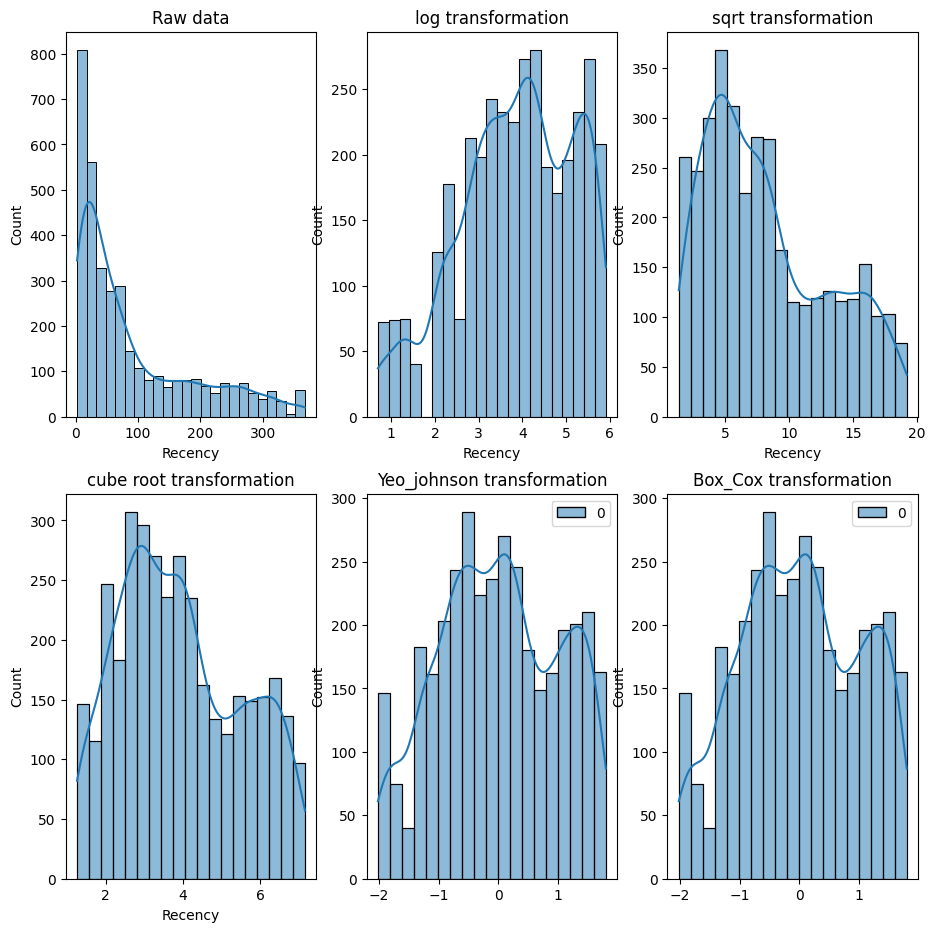

In [41]:
skew_analyzer(df, 'Recency')

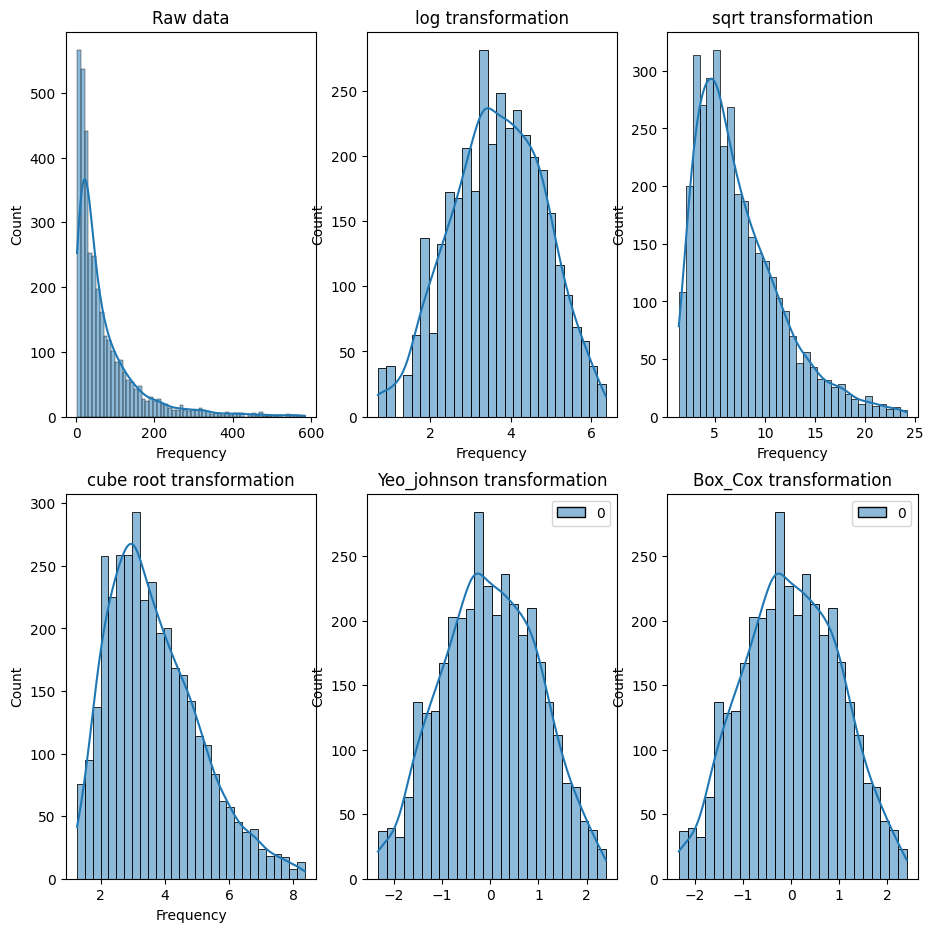

In [42]:
skew_analyzer(df, 'Frequency')

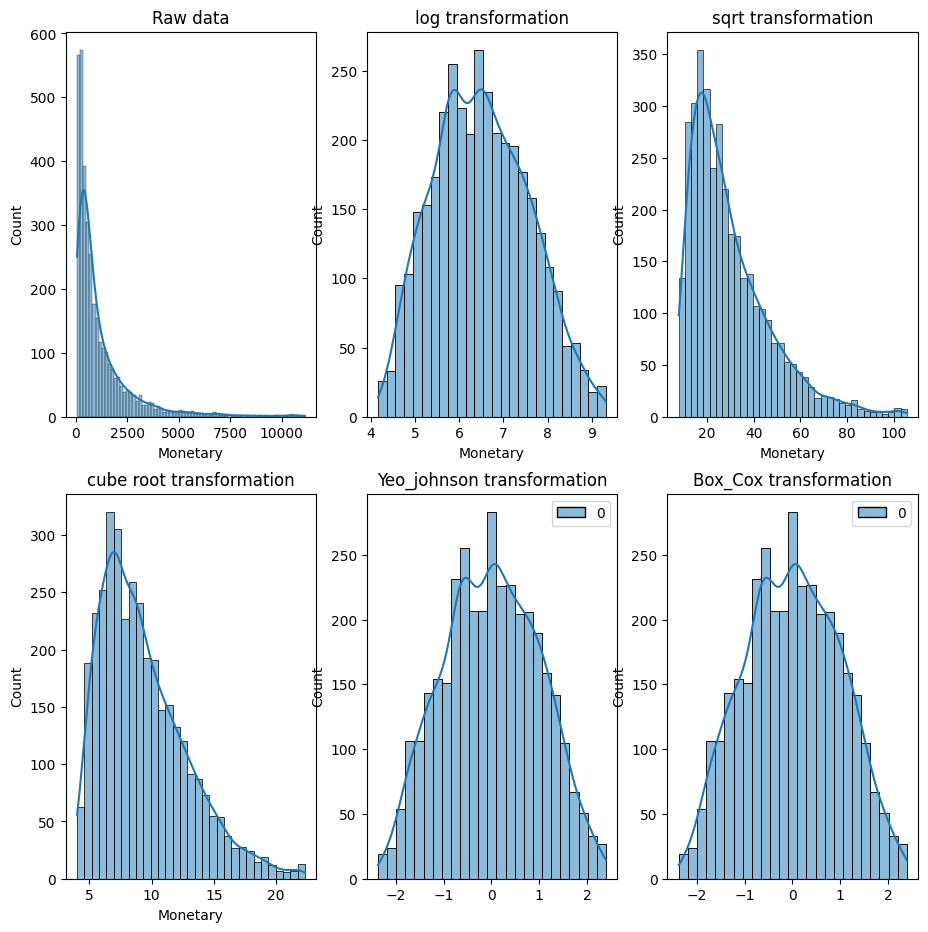

In [43]:
skew_analyzer(df, 'Monetary')

In [44]:
df2 = drop_outliers(RMF_data, 'Recency', min_percentile=0.05, max_percentile=0.95)

df2 = drop_outliers(df2, 'Frequency',min_percentile=0.05, max_percentile=0.95)

df2 = drop_outliers(df2, 'Monetary',min_percentile=0.05, max_percentile=0.95)

In [45]:
df2.describe()

,Recency,Frequency,Monetary
count,2795.000000,2795.000000,2795.000000
mean,82.189624,61.031485,932.807156
std,79.745411,54.509583,794.794350
min,3.000000,6.000000,135.400000
25%,22.000000,21.000000,336.650000
50%,52.000000,42.000000,656.600000
75%,119.000000,85.000000,1275.200000
max,309.000000,288.000000,3718.500000


In [46]:
## Lets see what % of data we lost

(len(RMF_data) - len(df2))/len(RMF_data) *100  # here we are losing 28.6% of data which is not good

28.69897959183674

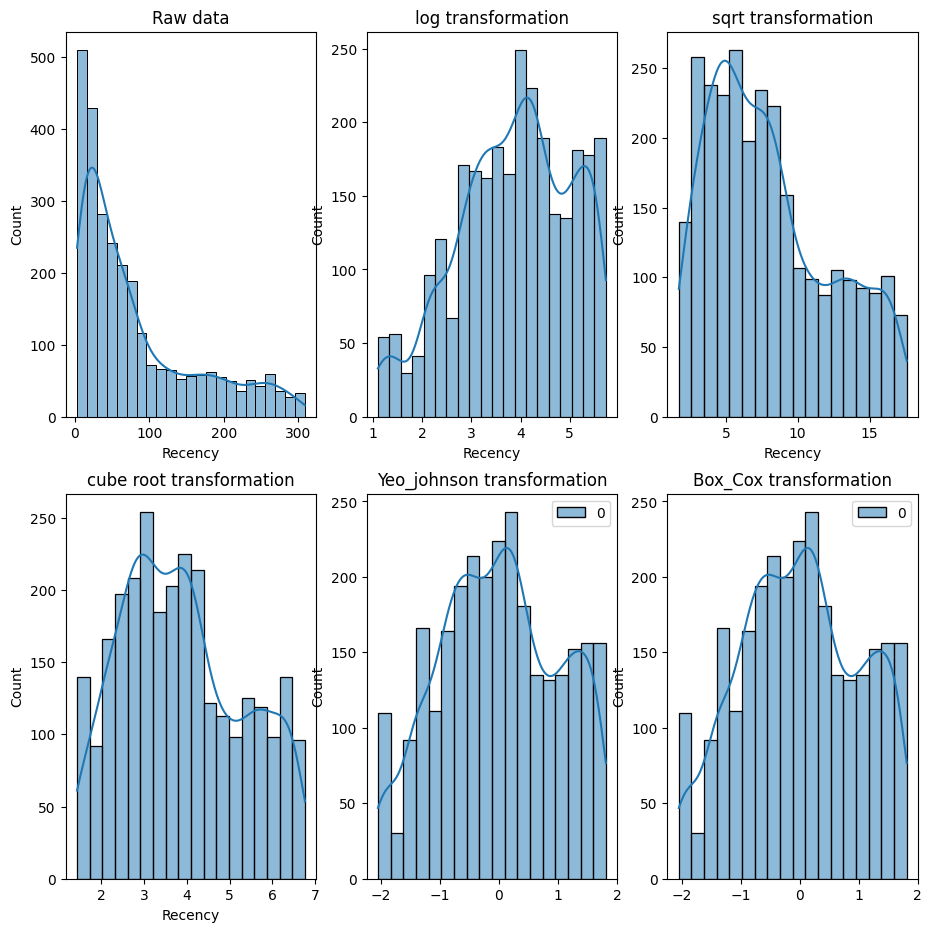

In [47]:
skew_analyzer(df2, 'Recency')

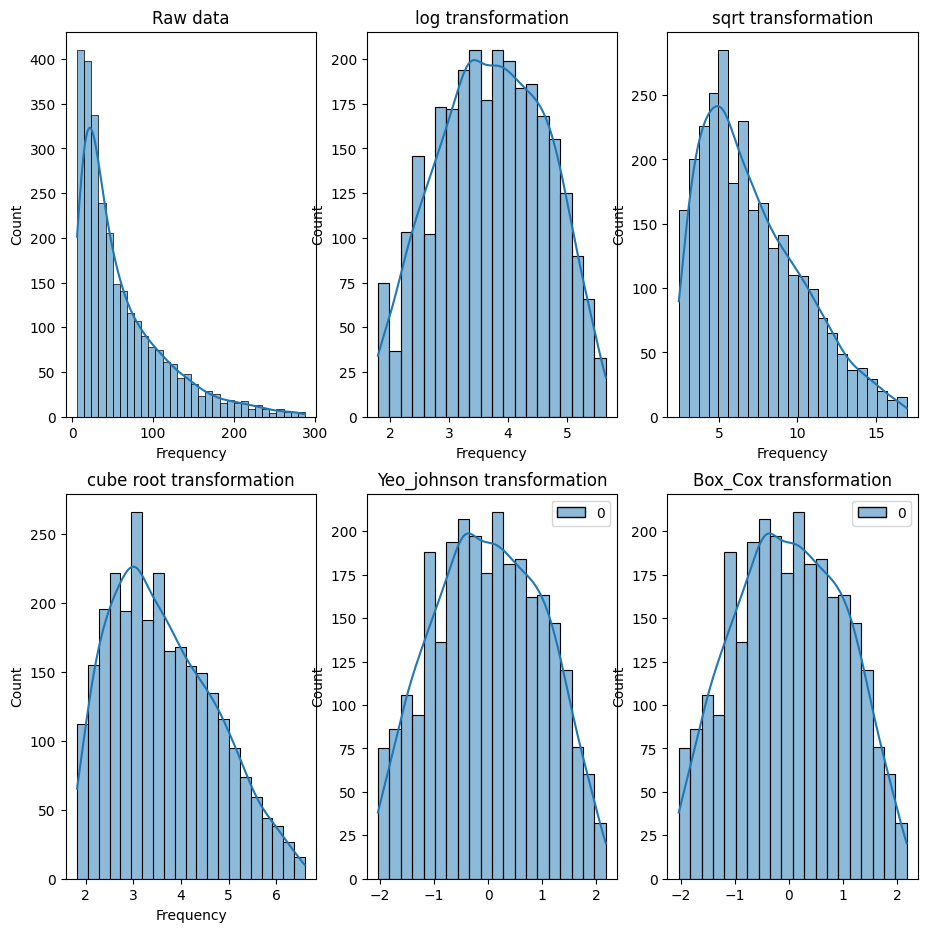

In [48]:
skew_analyzer(df2, 'Frequency')

In [49]:
# skew_analyzer(df2, 'Monetary')

### Lets see how Capping the Outliers affects the data distribution

In [50]:
## Capping the outliers wihin minimum and maximum value using IQR

def capping(data, column):
    
    df_temp = copy(data)
    iqr = df_temp[column].quantile(0.75) - df_temp[column].quantile(0.25)
    
    mini = df_temp[column].quantile(0.25) - 1.5 * iqr
    maxi = df_temp[column].quantile(0.75) + 1.5 * iqr
    
    df_temp[column] = df_temp[column].replace(df_temp[column].loc[df_temp[column]<mini].values, mini)
    df_temp[column] = df_temp[column].replace(df_temp[column].loc[df_temp[column]>maxi].values, maxi)
    
    return df_temp

In [51]:
RMF_data_capped = capping(RMF_data,'Frequency')
RMF_data_capped = capping(RMF_data_capped,'Monetary')
RMF_data_capped = capping(RMF_data_capped,'Recency')

In [52]:
RMF_data_capped.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,1.000,3490.775
12747.0,2.0,103.000,3490.775
12748.0,0.0,222.625,3490.775
12749.0,3.0,199.000,3490.775
12820.0,3.0,59.000,942.600


In [53]:
RMF_data_capped.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,90.730995,68.410555,1101.946569
std,96.892615,68.257864,1080.190076
min,0.000000,1.000000,3.800000
25%,17.000000,17.000000,300.150000
50%,50.000000,41.000000,651.650000
75%,142.000000,99.250000,1576.400000
max,329.500000,222.625000,3490.775000


C:\ProgramData\Anaconda3\envs\RFM_Customer_Segmentation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\RFM_Customer_Segmentation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\RFM_Customer_Segmentation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

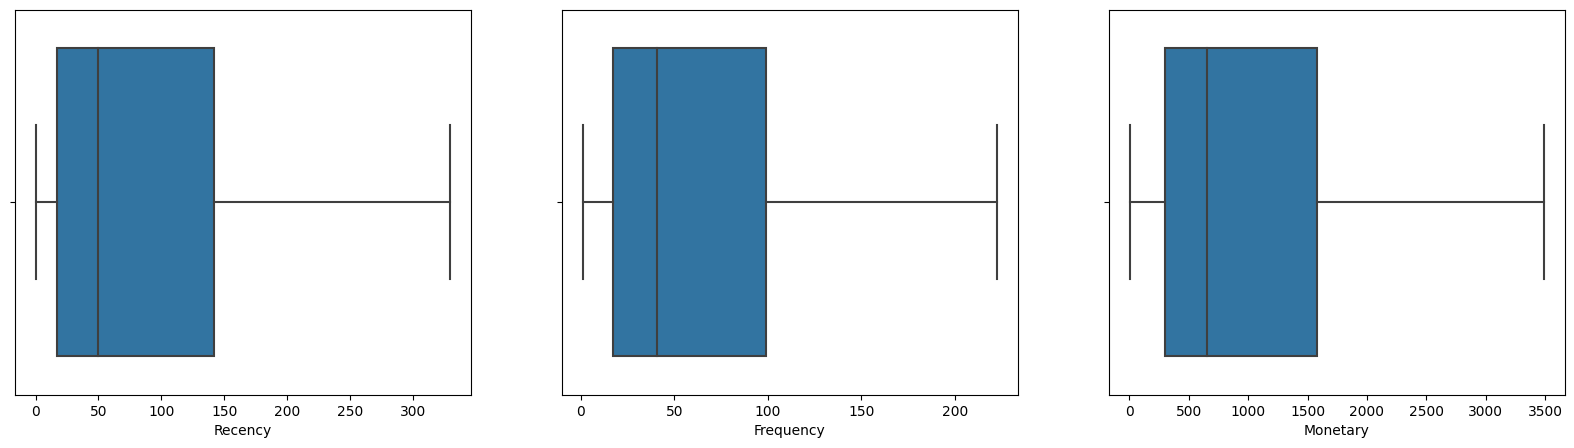

In [54]:
## Visualizing the boxplot of Recency, Frequency and Monetary columns after capping the outliers


fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.boxplot(RMF_data_capped['Recency'], ax=axes[0]);
sns.boxplot(RMF_data_capped['Frequency'], ax=axes[1]);
sns.boxplot(RMF_data_capped['Monetary'], ax=axes[2]);

C:\ProgramData\Anaconda3\envs\RFM_Customer_Segmentation\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


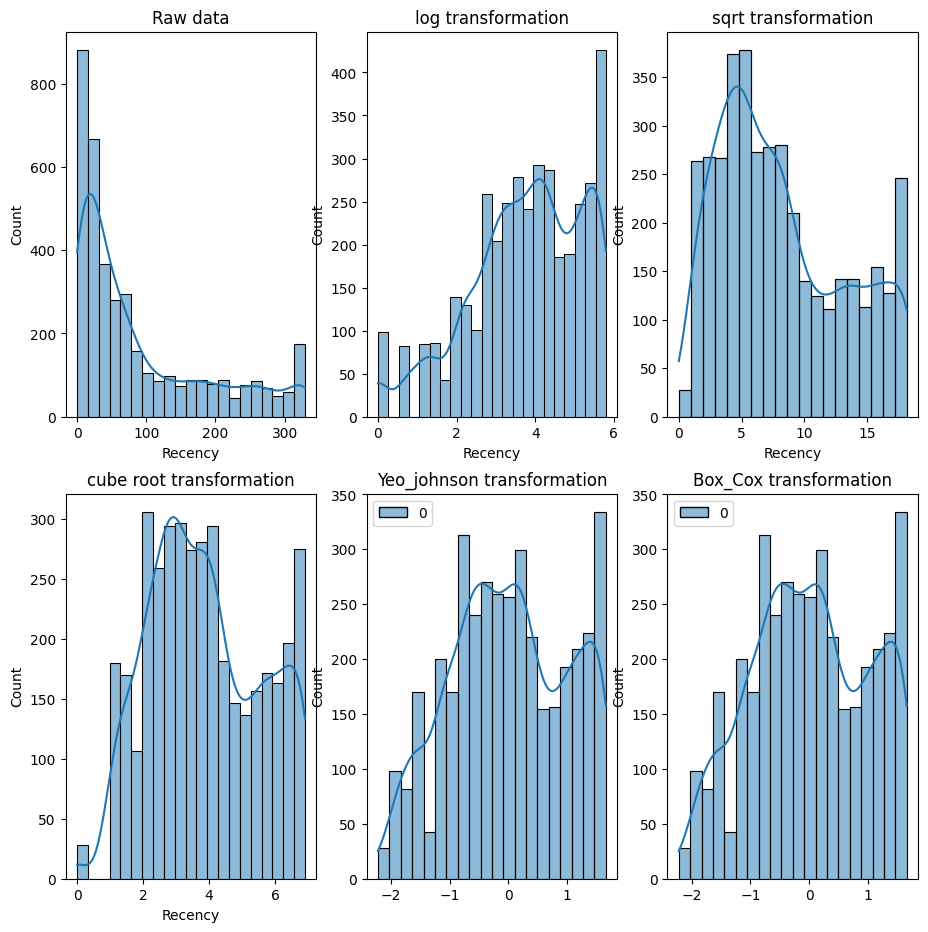

In [55]:
skew_analyzer(RMF_data_capped, 'Recency')

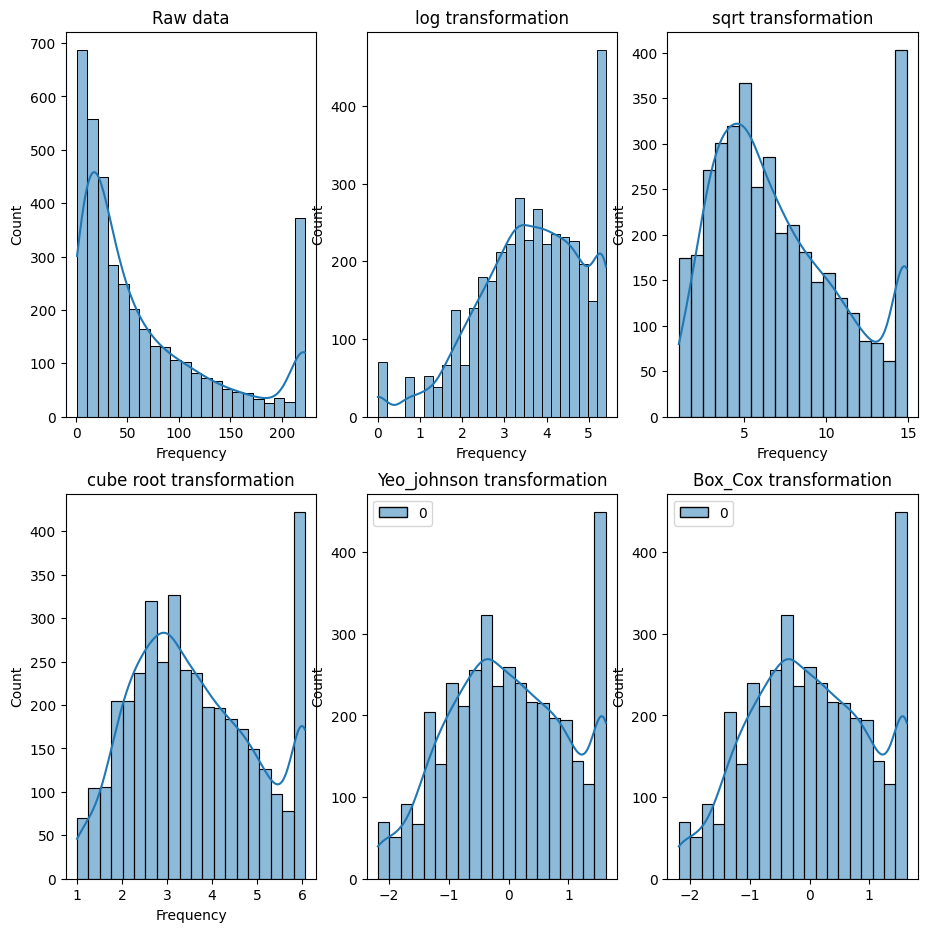

In [56]:
skew_analyzer(RMF_data_capped, 'Frequency')

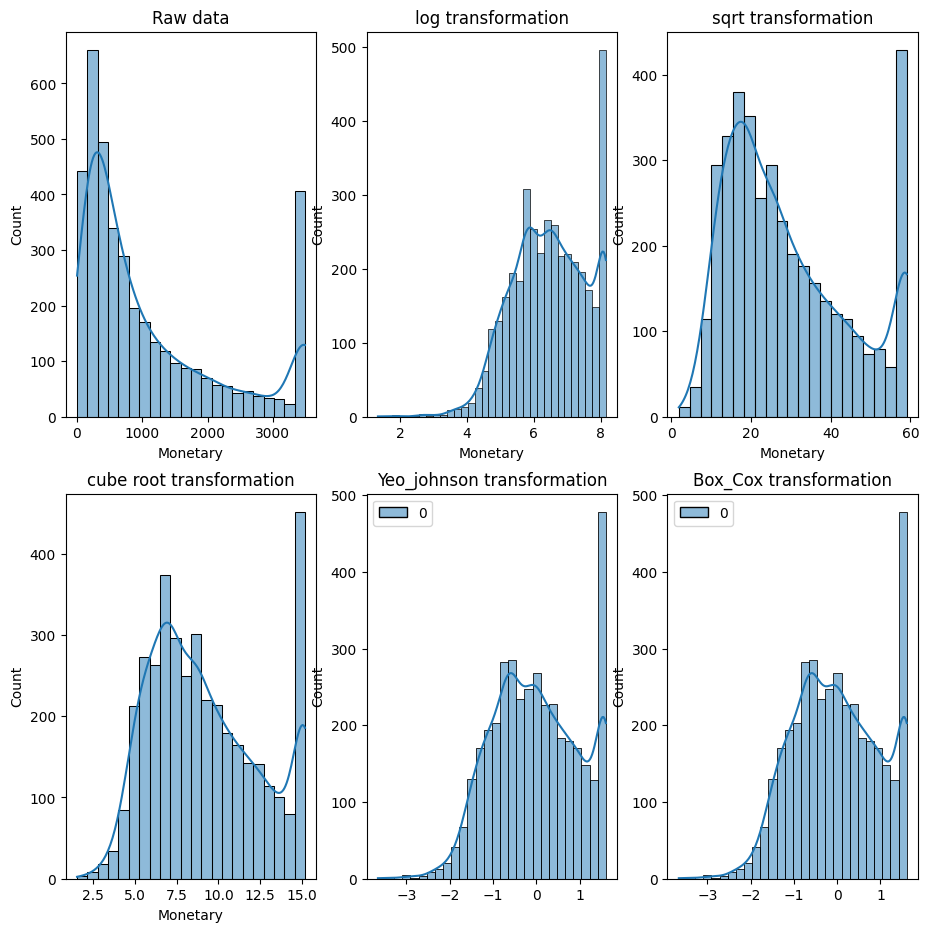

In [57]:
skew_analyzer(RMF_data_capped, 'Monetary')

## Lets apply KNN-Imputer on the outliers

In [58]:
## replacing the Outliers as Nan and KNNImputer is used for prediction

def replace_with_Nan(data, column, mini_percentile = 0.01, max_percentile = 0.99):
    
    df_temp = copy(data)
    
    mini = df_temp[column].quantile(mini_percentile)
    maxi = df_temp[column].quantile(max_percentile)
    
    df_temp[column] = df_temp[column].replace(df_temp[column].loc[df_temp[column]<mini].values, np.NaN)
    df_temp[column] = df_temp[column].replace(df_temp[column].loc[df_temp[column]>maxi].values, np.NaN)
    
    return df_temp

In [59]:
df_for_Imputer = replace_with_Nan(RMF_data, 'Recency')
df_for_Imputer = replace_with_Nan(df_for_Imputer, 'Frequency')
df_for_Imputer = replace_with_Nan(df_for_Imputer, 'Monetary')

In [60]:
RMF_data.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,90.388010,1864.480332
std,99.533485,217.808385,7482.860998
min,0.000000,1.000000,3.800000
25%,17.000000,17.000000,300.150000
50%,50.000000,41.000000,651.650000
75%,142.000000,99.250000,1576.400000
max,373.000000,7847.000000,259656.800000


In [61]:
df_for_Imputer.describe()

,Recency,Frequency,Monetary
count,3852.000000,3880.000000,3840.000000
mean,89.497923,76.739175,1339.392682
std,95.913145,97.925823,1950.728712
min,1.000000,1.000000,52.000000
25%,17.000000,16.000000,302.675000
50%,50.000000,40.000000,651.650000
75%,138.000000,97.000000,1544.675000
max,368.000000,662.000000,17256.800000


In [62]:
df_for_Imputer['Recency'].isnull().sum()

68

In [63]:
df_for_Imputer['Frequency'].isnull().sum()

40

In [64]:
df_for_Imputer['Monetary'].isnull().sum()

80

In [65]:
imputer = KNNImputer(n_neighbors=3)

df_after_imputation = pd.DataFrame(imputer.fit_transform(df_for_Imputer), index=df_for_Imputer.index, columns= df_for_Imputer.columns)

In [66]:
df_after_imputation.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.000000,1.000000,263.433333
12747.0,2.000000,103.000000,4195.500000
12748.0,89.497923,76.739175,1339.392682
12749.0,3.000000,199.000000,4090.200000
12820.0,3.000000,59.000000,942.600000


In [67]:
df_for_Imputer.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,1.0,NaN
12747.0,2.0,103.0,4195.5
12748.0,NaN,NaN,NaN
12749.0,3.0,199.0,4090.2
12820.0,3.0,59.0,942.6


In [68]:
RMF_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.6
12747.0,2,103,4195.5
12748.0,0,4595,33721.4
12749.0,3,199,4090.2
12820.0,3,59,942.6


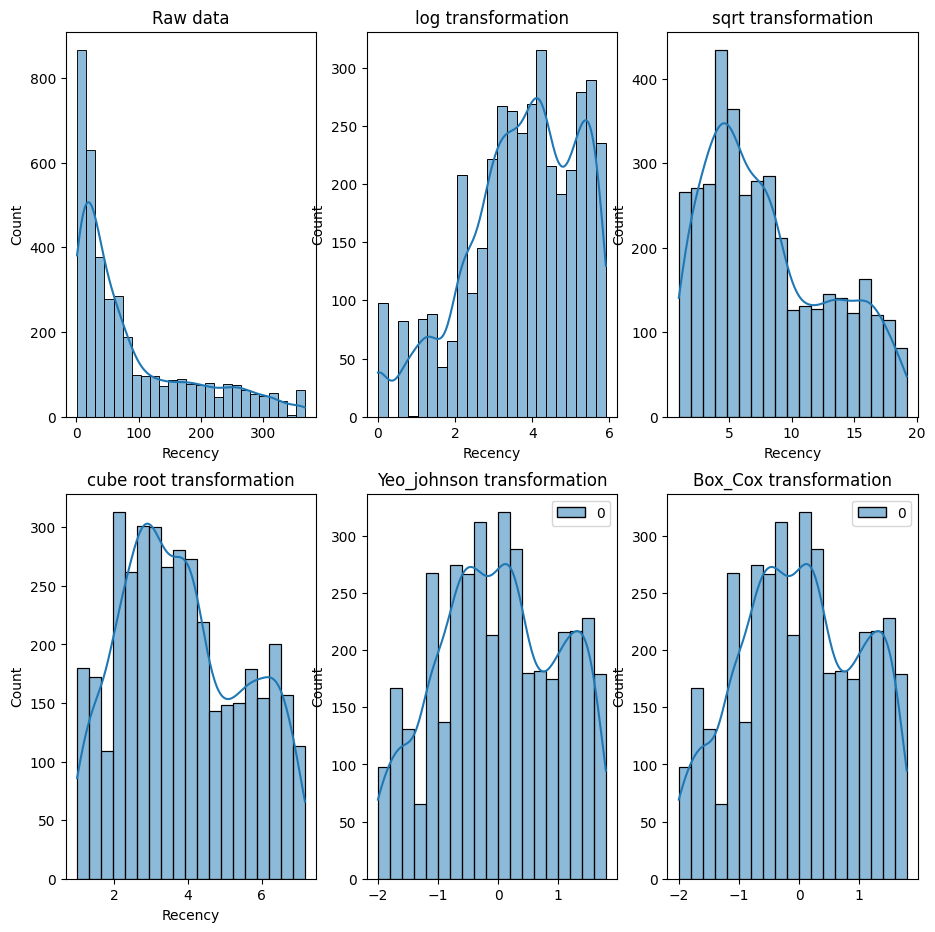

In [69]:
skew_analyzer(df_after_imputation, 'Recency')

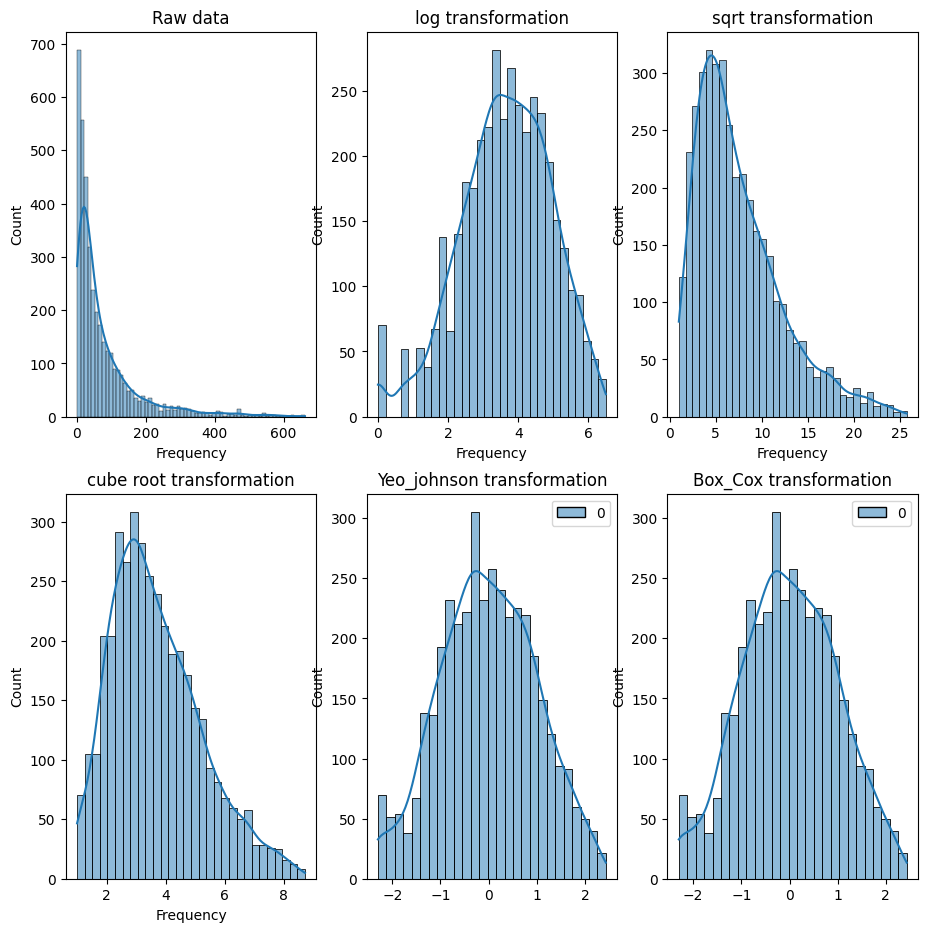

In [70]:
skew_analyzer(df_after_imputation, 'Frequency')

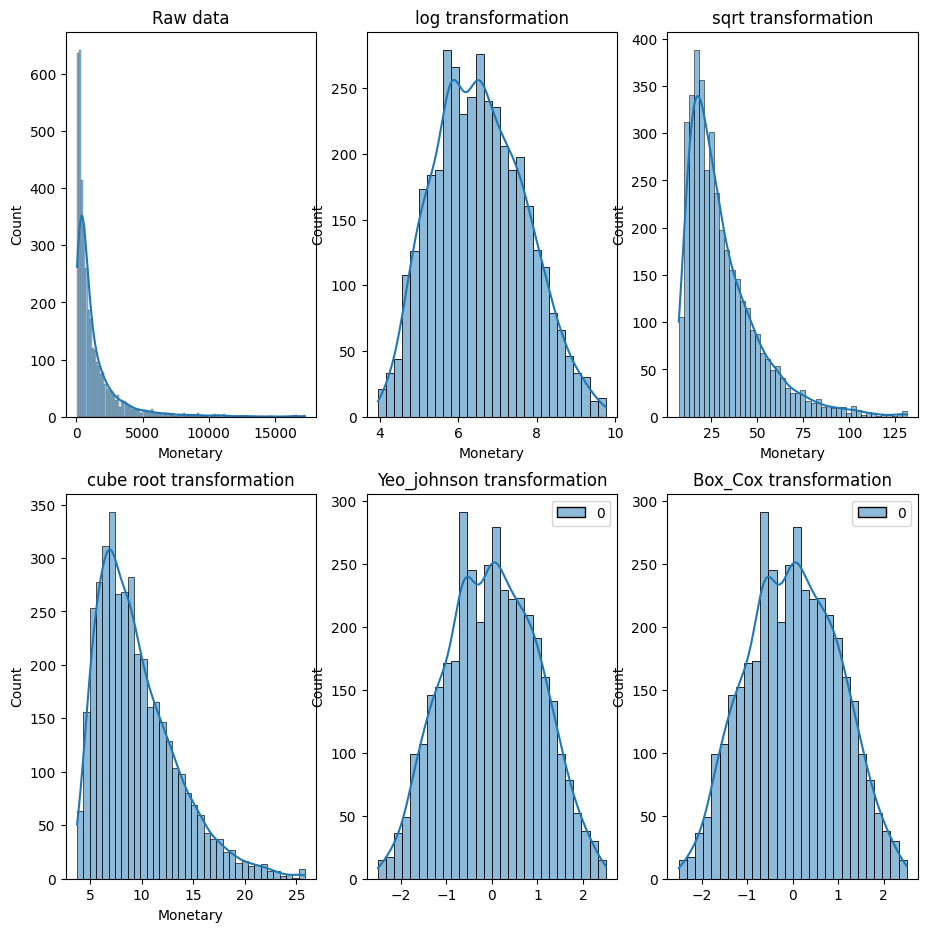

In [71]:
skew_analyzer(df_after_imputation, 'Monetary')

## Creating Pipeline for Feature Engineering and Model Training

In [77]:
# Yeo_johnson transformation in all the columns, and by-default this Standardize the data

trf_1 = ColumnTransformer([('yeo_johnson_transformer',PowerTransformer(),[0,1,2])],remainder='passthrough')